Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].


	This database is also available through the UW CS ftp server:

	ftp ftp.cs.wisc.edu
	cd math-prog/cpo-dataset/machine-learn/WDBC/


Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [1]:
## Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('wdbc.csv', header=0) ## Saving the data into a variable

In [3]:
data.head(10) ## Checking the data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
data.columns ## Checking the column names, previous cells is too big

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
to_remove = ['Unnamed: 32', 'id'] ## Defininf unnecessary columns

In [6]:
data.drop(to_remove,axis=1, inplace=True) ##removing unnecessary columns

In [7]:
data.head(10) ## Checking the data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


First let's convert our categorical data into numerical data, as this will allow to check correlation soon

In [8]:
data['diagnosis']=data['diagnosis'].map({'M':1, 'B':0}) ## Converting categorial feature into numerical
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [9]:
data.info() ## Checking if all are really numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Now let's first check the correlation between the diagnosis and the other features

<AxesSubplot:>

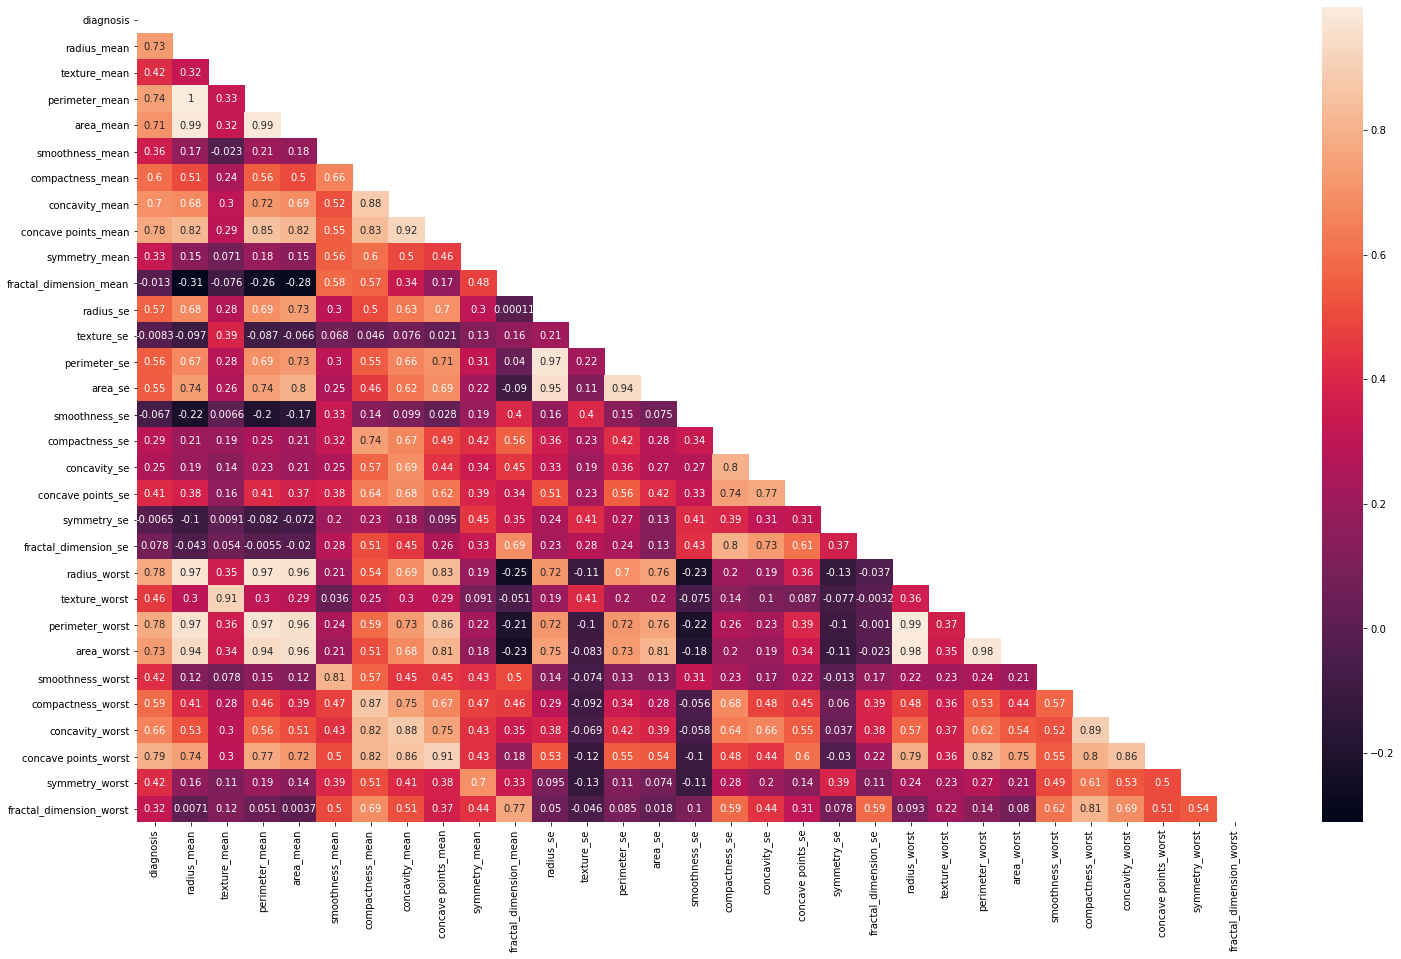

In [10]:
%matplotlib inline
mask = np.triu(np.ones_like(data.corr(),dtype=bool)) ## Defining the mask to hide part of the heatmatp

plt.subplots(figsize=(25,15))
sns.heatmap(data.corr(), annot=True, mask=mask) ## Creating the heatmap

In [11]:
correlation = data.corr()
columns  = correlation['diagnosis'].loc[(correlation['diagnosis']>=0.59)] ## Filtering columns with high correlation
columns = list(columns.index)
columns

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

<AxesSubplot:>

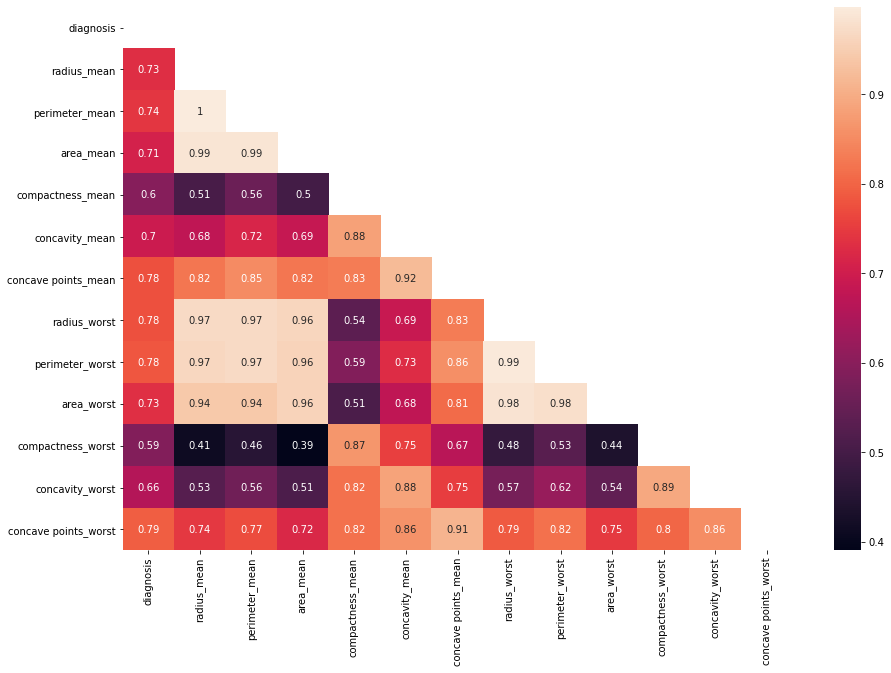

In [12]:
## Creating a new heatmatp for better visualization

%matplotlib inline
mask = np.triu(np.ones_like(data[columns].corr(),dtype=bool)) ## Defining the mask to hide part of the heatmatp

plt.subplots(figsize=(15,10))
sns.heatmap(data[columns].corr(), annot=True, mask=mask)

[Text(0, 0, 'Benign'), Text(1, 0, 'Malign')]

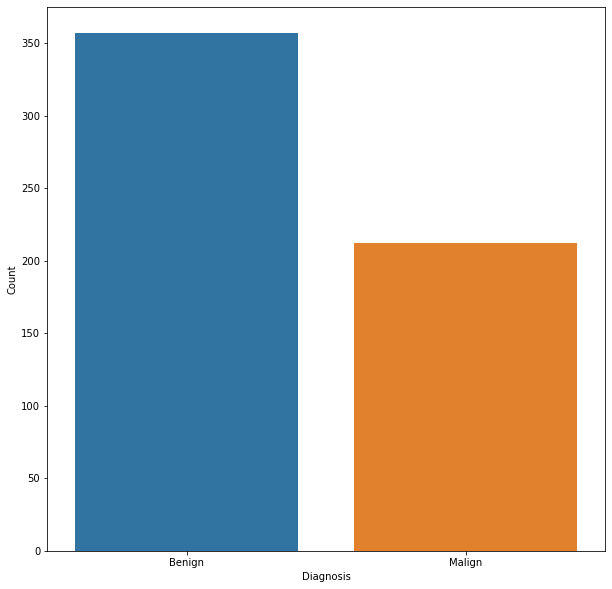

In [13]:
f, ax1 = plt.subplots(figsize=(10,10)) ## Creating figure to be able to plot personalized labels for x
sns.countplot(x="diagnosis",data=data) ## plotting data
plt.xlabel("Diagnosis") 
plt.ylabel("Count")
ax1.set_xticklabels(labels=['Benign', 'Malign']) ## AS 0 is benign, we use it first

We expect radius, perimeter and area to be very similar, as all parameters are affected by the radius

Text(0, 0.5, 'Count')

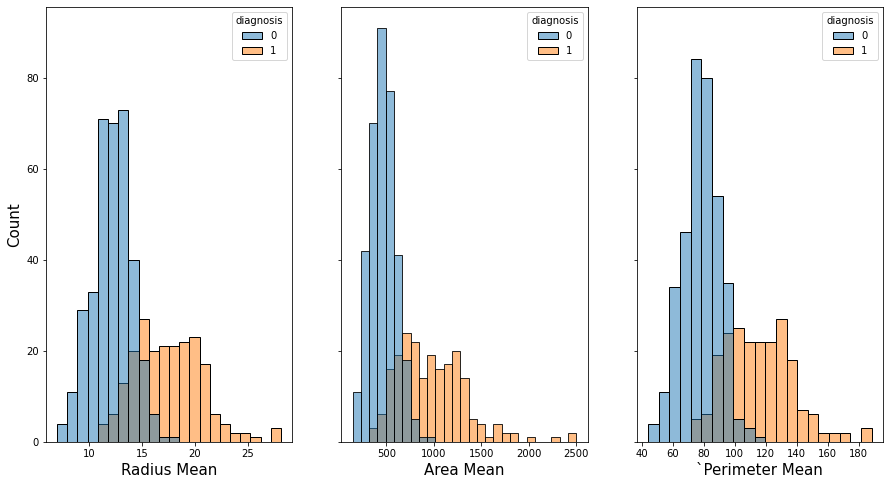

In [14]:
figure, (ax1,ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,8)) ## Creating 3 axes
sns.histplot(ax=ax1,data=data,x="radius_mean", hue="diagnosis")
sns.histplot(ax=ax2,data=data,x="area_mean", hue="diagnosis")
sns.histplot(ax=ax3,data=data,x="perimeter_mean", hue="diagnosis") ## Plotting all 3 variables that are similar
ax1.set_xlabel("Radius Mean", size=15)
ax2.set_xlabel("Area Mean", size=15)
ax3.set_xlabel("`Perimeter Mean", size=15) ## Setting the x-axis titles
ax1.set_ylabel("Count", size=15) 

## As we expected, radius is related to the area and perimeter, so the data is similar

Text(0, 0.5, 'Compactness Mean')

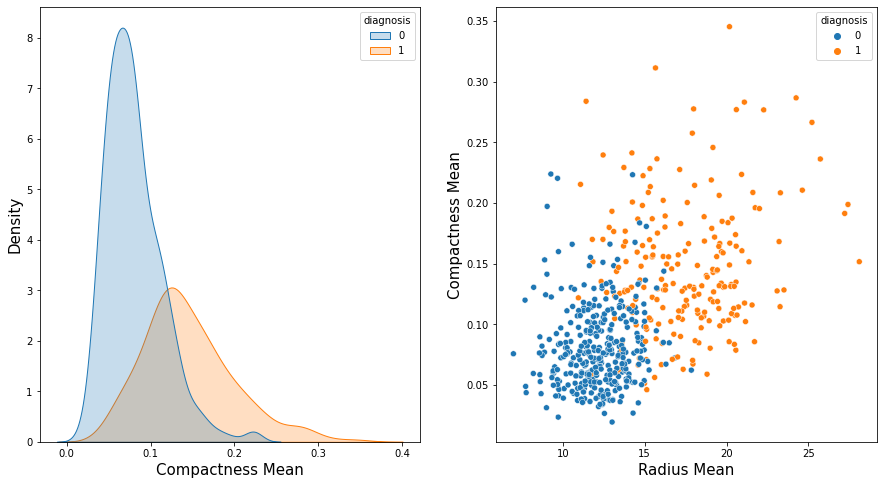

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8)) ## Creating 2 axes
sns.kdeplot(ax=ax1,data=data,x="compactness_mean", hue="diagnosis", fill=True) ## plotting the data
ax1.set_xlabel("Compactness Mean", size=15)
ax1.set_ylabel("Density", size=15)
plt.ylabel('Count', size=15) ## Setting labels of x and y
sns.scatterplot(ax=ax2,data=data,x="radius_mean",y="compactness_mean", hue="diagnosis") ## plotting the data
ax2.set_xlabel('Radius Mean', size=15)
ax2.set_ylabel('Compactness Mean', size=15) ## Setting labels of x and y
##Data here is more mixed, but with a good division between the data

Text(0, 0.5, 'Concavity Mean')

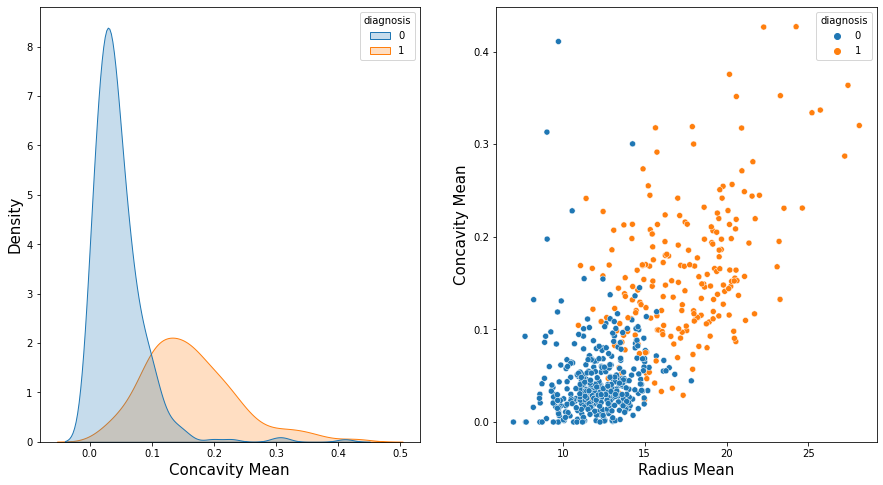

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8)) ## Creating 2 axes
sns.kdeplot(ax=ax1,data=data,x="concavity_mean", hue="diagnosis", fill=True) ## plotting the data
ax1.set_xlabel("Concavity Mean", size=15)
ax1.set_ylabel("Density", size=15) ## Setting labels of x and y
plt.ylabel('Count', size=15) 
sns.scatterplot(ax=ax2,data=data,x="radius_mean",y="concavity_mean", hue="diagnosis") ## plotting the data
ax2.set_xlabel('Radius Mean', size=15)
ax2.set_ylabel('Concavity Mean', size=15) ## Setting labels of x and y

## We can see that the data here is well divided!

Text(0, 0.5, 'concave points Mean')

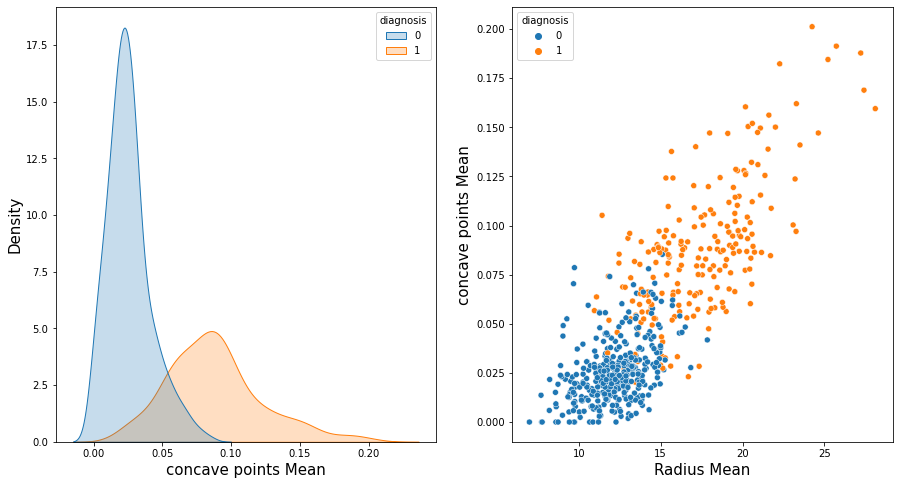

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))  ## Creating 2 axes
sns.kdeplot(ax=ax1,data=data,x="concave points_mean", hue="diagnosis", fill=True) ## plotting the data
ax1.set_xlabel("concave points Mean", size=15) 
ax1.set_ylabel("Density", size=15)
plt.ylabel('Count', size=15) ## Setting labels of x and y
sns.scatterplot(ax=ax2,data=data,x="radius_mean",y="concave points_mean", hue="diagnosis") ## plotting the data
ax2.set_xlabel('Radius Mean', size=15)
ax2.set_ylabel('concave points Mean', size=15) ## Setting labels of x and y

## We can see that the data here is well divided!

From all graphs, we see that there's a "division" between the Benign and Malign Cancer. In this case, we'll try to come up with a Machine Learning Algorithm that is capable of drawing this "division" and correctly classify our cases based on the selected features:

- Radius/Perimeter/Area
- Compactness
- Concavity
- Concave ponits

In [18]:
new_data = data[columns] ##Creading a new dataframe based on the column we saved before
features = new_data.drop('diagnosis',axis=1) ##Dropping diagnosis as this is our target
targets = new_data['diagnosis'] ## Defining target

-----------------------------------------------------------------------------------------------
## Using KNN and GridSearchCV

In [19]:
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as knn

In [20]:
x_train, x_test, y_train, y_test = tts(features, targets, test_size=0.20) ## Defining the test and train datasets
parameters = [{'n_neighbors':[3,4,5,6,7,8]}] ## Setting the parameter for the GridSearch

model_knn = knn(weights="distance",
                p=2, metric="euclidean") ## Defining the model

grid_knn = GridSearchCV(model_knn, parameters, n_jobs=8) ## Defining the gridsearch
grid_knn.fit(x_train,np.ravel(y_train)) ##Fitting the data

print("Best parameters: \n n_neighbors=",grid_knn.best_params_['n_neighbors']) ## Getting the best parameter

model_knn = knn(n_neighbors=grid_knn.best_params_['n_neighbors'],
                weights="distance",
                p=2, metric="euclidean") ##Defining the model with the best parameter

results_knn = model_knn.fit(x_train,np.ravel(y_train)) ##Fitting the data with best parameter

print("The total accuracy of the model  is: ", results_knn.score(x_test,y_test)) ## Printing accuracy to check

Best parameters: 
 n_neighbors= 7
The total accuracy of the model  is:  0.9385964912280702


In [21]:
accuracy = []
for i in range(50):
    x_train, x_test, y_train, y_test = tts(features, targets, test_size=0.20)
    
    parameters = [{'n_neighbors':[3,4,5,6,7,8]}]
    
    model_knn = knn(weights="distance",
                    p=2, metric="euclidean")
    
    grid_knn = GridSearchCV(model_knn, parameters, n_jobs=8)
    grid_knn.fit(x_train,np.ravel(y_train))
    
    model_knn = knn(n_neighbors=grid_knn.best_params_['n_neighbors'],
                    weights="distance",
                    p=2,
                    metric="euclidean")
    
    results_knn = model_knn.fit(x_train,np.ravel(y_train))
    
    accuracy.append(results_knn.score(x_test,y_test))

<AxesSubplot:>

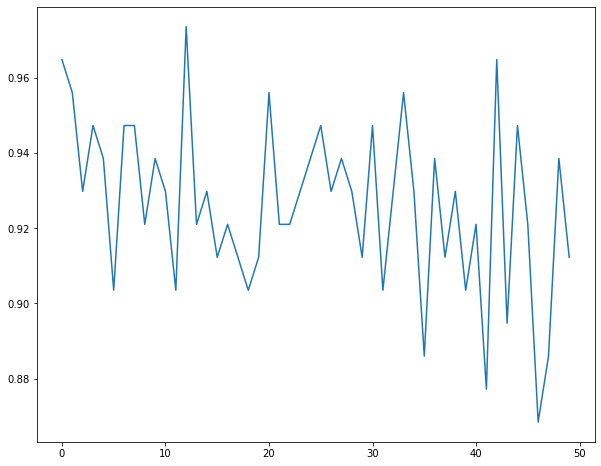

In [22]:
plt.subplots(figsize=(10,8))
sns.lineplot(data=accuracy)

In [23]:
np.mean(accuracy)

0.9261403508771928

-----------------------------------------------------------------------------------------------
## Using SVM and GridSearchCV

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [25]:
copy_data = features.copy() ## Creating a copy of the dataset (not including the diagnosis column)

scaler = MinMaxScaler() ## Defining the scaler for the SVM algorith

escaled_copy_data = pd.DataFrame(scaler.fit_transform(copy_data), columns=[features.columns]) 
## Scaling the data and saving it into a dataframe with the same columns as before            
    
escaled_copy_data

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,0.521037,0.545989,0.363733,0.792037,0.703140,0.731113,0.620776,0.668310,0.450698,0.619292,0.568610,0.912027
1,0.643144,0.615783,0.501591,0.181768,0.203608,0.348757,0.606901,0.539818,0.435214,0.154563,0.192971,0.639175
2,0.601496,0.595743,0.449417,0.431017,0.462512,0.635686,0.556386,0.508442,0.374508,0.385375,0.359744,0.835052
3,0.210090,0.233501,0.102906,0.811361,0.565604,0.522863,0.248310,0.241347,0.094008,0.814012,0.548642,0.884880
4,0.629893,0.630986,0.489290,0.347893,0.463918,0.518390,0.519744,0.506948,0.341575,0.172415,0.319489,0.558419
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.678668,0.566490,0.296055,0.571462,0.690358,0.623266,0.576174,0.452664,0.178527,0.328035,0.761512
565,0.622320,0.604036,0.474019,0.257714,0.337395,0.486630,0.560655,0.520892,0.379915,0.159997,0.256789,0.559450
566,0.455251,0.445788,0.303118,0.254340,0.216753,0.263519,0.393099,0.379949,0.230731,0.273705,0.271805,0.487285
567,0.644564,0.665538,0.475716,0.790197,0.823336,0.755467,0.633582,0.668310,0.402035,0.815758,0.749760,0.910653


In [26]:
x_train, x_test, y_train, y_test = tts(escaled_copy_data, targets, test_size=0.20)

parameters_svc = [{'C':[0.001, 0.01,0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1,1,10, 100]}]
model_svm = SVC()

grid_svm = GridSearchCV(model_svm, parameters_svc,
                        n_jobs=8,
                        cv=3)
grid_svm.fit(x_train,np.ravel(y_train))

print("Best parameters:\nC =",grid_svm.best_params_['C'],"\ngamma =", grid_svm.best_params_['gamma'])

model_svm = SVC(C=grid_svm.best_params_['C'],
                kernel='rbf',
                gamma=grid_svm.best_params_['gamma'],
                class_weight='balanced')
results_svm = model_knn.fit(x_train,np.ravel(y_train))

print(results_svm.score(x_test,y_test))

Best parameters:
C = 10 
gamma = 1
0.9122807017543859


In [27]:
accuracy_svm = []
for i in range(50):
    x_train, x_test, y_train, y_test = tts(escaled_copy_data, targets, test_size=0.20)
    
    parameters_svc = [{'C':[0.001, 0.01,0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1,1,10, 100]}]
    model_svm = SVC()
    
    grid_svm = GridSearchCV(model_svm, parameters_svc,
                            n_jobs=8,
                            cv=3)
    grid_svm.fit(x_train,np.ravel(y_train))
    
    model_svm = SVC(C=grid_svm.best_params_['C'],
                    kernel='rbf',
                    gamma=grid_svm.best_params_['gamma'],
                    class_weight='balanced')
    results_svm = model_knn.fit(x_train,np.ravel(y_train))
    
    accuracy_svm.append(results_svm.score(x_test,y_test))

<AxesSubplot:>

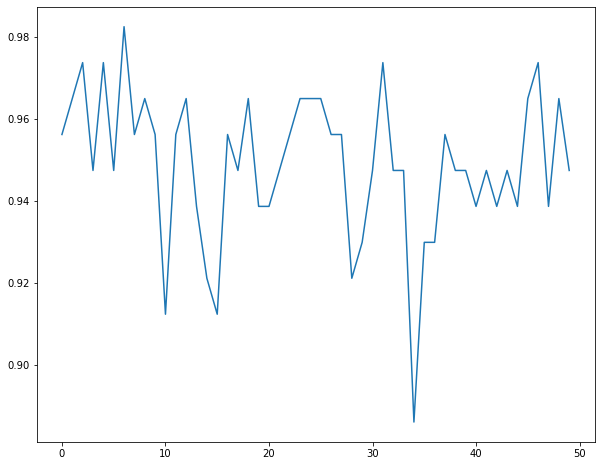

In [28]:
plt.subplots(figsize=(10,8))
sns.lineplot(data=accuracy_svm)

In [29]:
np.mean(accuracy_svm)

0.9489473684210527

---------

## Checking if the data is overfitting

In [30]:
## Getting scores with our test data:
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = tts(escaled_copy_data, targets, test_size=0.20)

model_svm = SVC(C=grid_svm.best_params_['C'],
                kernel='rbf',
                gamma=grid_svm.best_params_['gamma'],
                class_weight='balanced')
results_svm = model_knn.fit(x_train,np.ravel(y_train))

y_pred_test = results_svm.predict(x_test) ## Predicting the y_test, based on the fit of the model
print("The accuracy for the test dataset is: ", accuracy_score(y_test,y_pred_test))
        ## Checking accuracy with preditcted values and true values

y_pred_train = results_svm.predict(x_train) ## Predicting y_train based on x_train and the model. 
## Note that that model used x_train and y_train, so it should have a higher accuracy compared to the test
print("The accuracy for the train dataset is: ", accuracy_score(y_train,y_pred_train)) 
        ## Checking the accuracy for the train data

The accuracy for the test dataset is:  0.956140350877193
The accuracy for the train dataset is:  1.0


In [31]:
model_svm

SVC(C=100, class_weight='balanced', gamma=1)